In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys, warnings, os
from sklearn.dummy import DummyClassifier

In [2]:
# To ignore max-iteration warnings while cross validating scores 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
# Setting Columns and rows to display all the results 
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [4]:
#Reading the dataset
ufc_master_ds = pd.read_csv("~/Desktop/ufc_data/ufc-master.csv")
#Separating label from input 
label = ufc_master_ds.Winner

#Removed "B_Women's Featherweight_rank" because inputing with this feature in the dataset gives me a ton of erors in the baseline model
X = ufc_master_ds.drop(['Winner', "B_Women's Featherweight_rank"], axis=1)

In [5]:
#Display the first few rows of a Dataframe
X.head(5)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
#Encoding categorical variables 
#Separating the features based on their data types 
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
num_col = [col for col in X.columns if col not in cat_col]


In [7]:
enc = LabelEncoder()
for i in X[cat_col]:
    #using astype(str) to avoid columns with 'float and str' to throw errors
    X[i] = enc.fit_transform(X[i].astype(str))

In [8]:
#Also encoding Label for Red to be 1 and Blue to be 0 
label = [1 if win == 'Red' else 0 for win in label]

In [9]:
# By setting a random seed with `random_state` parameter, you ensure that the data is split in the same way every time you run the code
# aka you will always get the same datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, label, random_state = 2, test_size = 0.3)

In [10]:
X_train.isnull().sum().sort_values(ascending=False)

R_Women's Featherweight_rank    3127
B_Pound-for-Pound_rank          3118
B_Women's Flyweight_rank        3112
R_Women's Flyweight_rank        3100
B_Women's Strawweight_rank      3093
B_Welterweight_rank             3085
B_Lightweight_rank              3079
B_Women's Bantamweight_rank     3078
B_Bantamweight_rank             3075
B_Featherweight_rank            3073
B_Flyweight_rank                3071
B_Light Heavyweight_rank        3068
B_Middleweight_rank             3065
R_Women's Strawweight_rank      3060
B_Heavyweight_rank              3059
R_Women's Bantamweight_rank     3052
R_Welterweight_rank             3048
R_Lightweight_rank              3048
R_Middleweight_rank             3043
R_Flyweight_rank                3041
R_Bantamweight_rank             3039
R_Light Heavyweight_rank        3039
R_Featherweight_rank            3039
R_Heavyweight_rank              3037
R_Pound-for-Pound_rank          3030
B_match_weightclass_rank        2584
R_match_weightclass_rank        2272
R

In [11]:
# Using imputation to fill in null values for numerical columns
imp = SimpleImputer(strategy='most_frequent')
print(imp)
imp.fit(X_train[num_col])
X_train[num_col] = imp.transform(X_train[num_col])
X_valid[num_col] = imp.transform(X_valid[num_col])

SimpleImputer(strategy='most_frequent')


## The `cat_col` for the next cell is an empty Dataframe and is causing the code to error out

In [12]:
# Using imputation to fill in null values for categorical columns
cat_imp = SimpleImputer(strategy = 'most_frequent')
print(X_train[cat_col].shape)
cat_imp.fit(X_train[cat_col])
X_train[cat_col] = cat_imp.transform(X_train[cat_col])
X_valid[cat_col] = cat_imp.transform(X_valid[cat_col])


(3131, 13)


## Re-opened cell and magically the dataframe shape changed from `(3131, 0)` to `(3131, 13)`

In [13]:
X_train.sample(10)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
3690,1014,298,-450.0,400.0,22.222222,400.000000,55,73,5,0.0,7,1,5.0,0.0,1.0,0.0,43.500000,0.4350,0.000000,1.000000,0.500000,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,175.26,175.26,185.0,0.0,1.0,0.0,44.421053,0.454211,0.105263,0.736842,0.271579,7.0,5.0,45.0,5.0,0.0,0.0,4.0,8.0,1.0,1.0,14.0,2,185.42,190.50,185.0,38.0,40.0,0.0,0.0,-6.0,-13.0,4.0,-40.0,-5.0,-9.0,-1.0,-10.16,-15.24,-2.0,-0.921053,-0.105263,0.263158,0.0,1.0,9.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,13.0,6.0,5.0,10.0,8.0,7.0,7.0,6.0,9.0,7.0,9.0,12.0,8.0,12.0,5.0,9.0,9.0,12.0,14.0,2,1,24,1.0,130,137.0,0.0,1.0,12.0,8.0,21.0,16.0,0.57,0.50,12.0,8.0,21.0,16.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,514,819,-117.0,-103.0,85.470085,97.087379,240,66,26,0.0,5,1,3.0,1.0,0.0,0.0,2.020000,0.3900,0.000000,0.670000,0.200000,1.0,2.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,182.88,187.96,205.0,0.0,1.0,0.0,7.920000,0.520000,0.000000,0.000000,0.000000,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,193.04,200.66,205.0,29.0,27.0,1.0,-1.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,-10.16,-12.70,-2.0,-5.900000,0.000000,0.670000,1.0,1.0,9.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,13.0,6.0,5.0,10.0,8.0,7.0,7.0,6.0,9.0,7.0,9.0,12.0,8.0,12.0,5.0,9.0,9.0,12.0,14.0,2,1,15,1.0,104,111.0,2.0,0.0,14.0,5.0,24.0,7.0,0.58,0.71,14.0,5.0,24.0,7.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2415,213,1281,170.0,-200.0,170.000000,50.000000,44,58,21,0.0,3,1,3.0,1.0,0.0,0.0,60.200000,0.4080,1.000000,0.800000,0.266000,2.0,2.0,14.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1,167.64,175.26,135.0,2.0,0.0,0.0,46.166667,0.418333,0.500000,0.833333,0.325833,3.0,5.0,34.0,1.0,0.0,2.0,4.0,1.0,0.0,0.0,7.0,2,160.02,160.02,125.0,34.0,22.0,1.0,0.0,-1.0,-4.0,3.0,-20.0,-1.0,-1.0,0.0,7.62,15.24,12.0,14.033333,0.500000,-0.033333

In [14]:
#A DummyClassifier is used to be a baseline to compare a better model's performance later on
base_model = DummyClassifier(random_state=2)

In [15]:
base_model.fit(X_train, y_train)

DummyClassifier(random_state=2)

In [16]:
preds = base_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.5991058122205664

## 1. What is happening under the hood of the `DummyClassifier` method? 

## 2. Why is the baseline prediction for this DummyClassifier higher than the accuracy for the Dummy Classifier in the authors model?

In [17]:
ufc_master_ds.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
ufc_master_ds['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_master_ds.Winner]

In [19]:
ufc_master_ds.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,0,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,0,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,0,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### R_ev & B_ev { total return on a bet of $100$ }

In [20]:
num_corr_col = [col for col in ufc_master_ds.columns if ufc_master_ds[col].dtype == "int64" or ufc_master_ds[col].dtype == "float64"]
corr_dict = {}
#Getting absolute values of correlation since we would need to inspect negative correlation too
for col in num_corr_col: 
    corr_dict[col] = abs(ufc_master_ds[col].corr(ufc_master_ds['Winner']))

## What is Correlation? 

In [21]:
for w in sorted(corr_dict, key=corr_dict.get):
    print(w, corr_dict[w])

B_Pound-for-Pound_rank 4.0438642413036e-18
B_avg_TD_pct 0.0001208701477274281
R_Welterweight_rank 0.0002567486330368463
B_win_by_Submission 0.0019219707008032848
R_Pound-for-Pound_rank 0.002228716928847187
R_draw 0.002268943091645934
R_Weight_lbs 0.003057520088610931
R_Height_cms 0.003794345588755294
B_avg_SUB_ATT 0.0041671081242588255
R_win_by_Decision_Unanimous 0.004282054361626812
B_longest_win_streak 0.005064693501448313
R_win_by_KO/TKO 0.005143504980737808
total_title_bout_dif 0.006541989404958486
R_win_by_Submission 0.007146079004340052
sub_dif 0.007394412534057673
R_wins 0.008635375893735945
B_win_by_TKO_Doctor_Stoppage 0.010084985540472557
R_rev_bout 0.010526635293824535
B_wins 0.011624583559467275
B_win_by_Decision_Majority 0.01264028115942169
empty_arena 0.013073493242466363
R_win_by_Decision_Majority 0.014170122345257139
B_win_by_KO/TKO 0.015069060248976831
R_Reach_cms 0.015153621330814694
B_win_by_Decision_Unanimous 0.016033821891185938
B_draw 0.01621493567534006
B_avg_SIG_

## The greatest contributions to the outcome of a fight are the columns with a correlation greater than 0.25

In [22]:
ufc_master_ds['B_kd_bout'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.])

In [23]:
#Calculating the null value percentages 
(ufc_master_ds['B_kd_bout'].isnull().sum()/ufc_master_ds.shape[0])*100

38.028169014084504

In [24]:
#For visualization purposes 
ufc_master_ds['Winner'] = ['Red' if winner == 1 else 'Blue' for winner in ufc_master_ds.Winner]

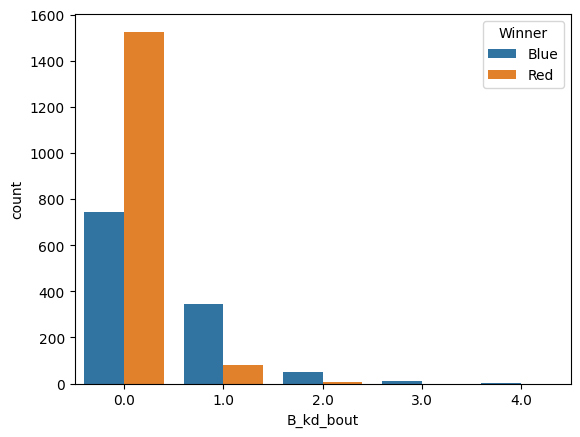

In [25]:
sns.countplot(x=ufc_master_ds['B_kd_bout'], hue = ufc_master_ds['Winner']);

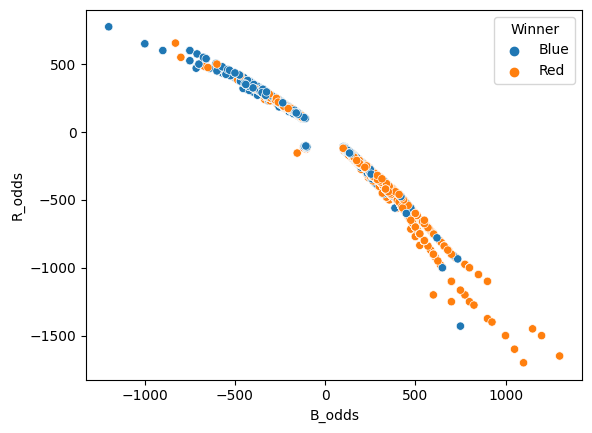

In [26]:
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = ufc_master_ds);


In [27]:
ufc_master_ds["Winner"].loc[ufc_master_ds["B_odds"] > 1].value_counts()

Winner
Red     1906
Blue     846
Name: count, dtype: int64

In [28]:
[(ufc_master_ds[col].isnull().sum()/ufc_master_ds.shape[0])*100 for col in ['R_sig_str_pct_bout','B_sig_str_pct_bout']]

[38.028169014084504, 38.028169014084504]

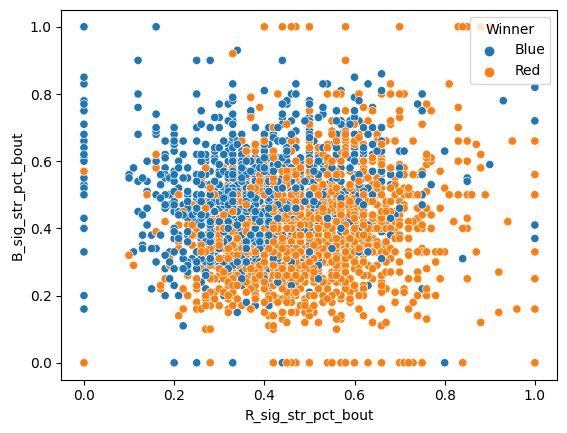

In [29]:
sns.scatterplot(x='R_sig_str_pct_bout',y='B_sig_str_pct_bout',hue = 'Winner', data=ufc_master_ds);

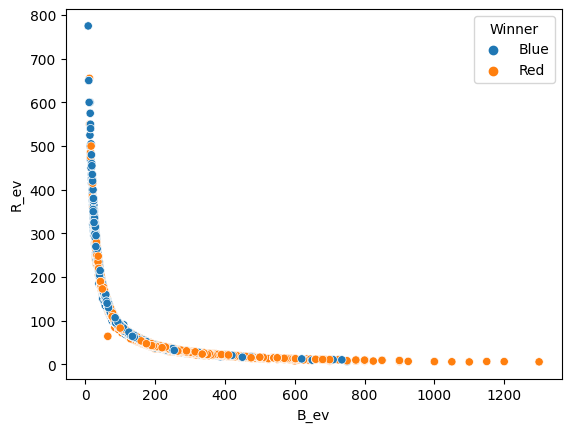

In [30]:
sns.scatterplot(x='B_ev', y='R_ev', hue="Winner", data=ufc_master_ds);

(4473, 137)


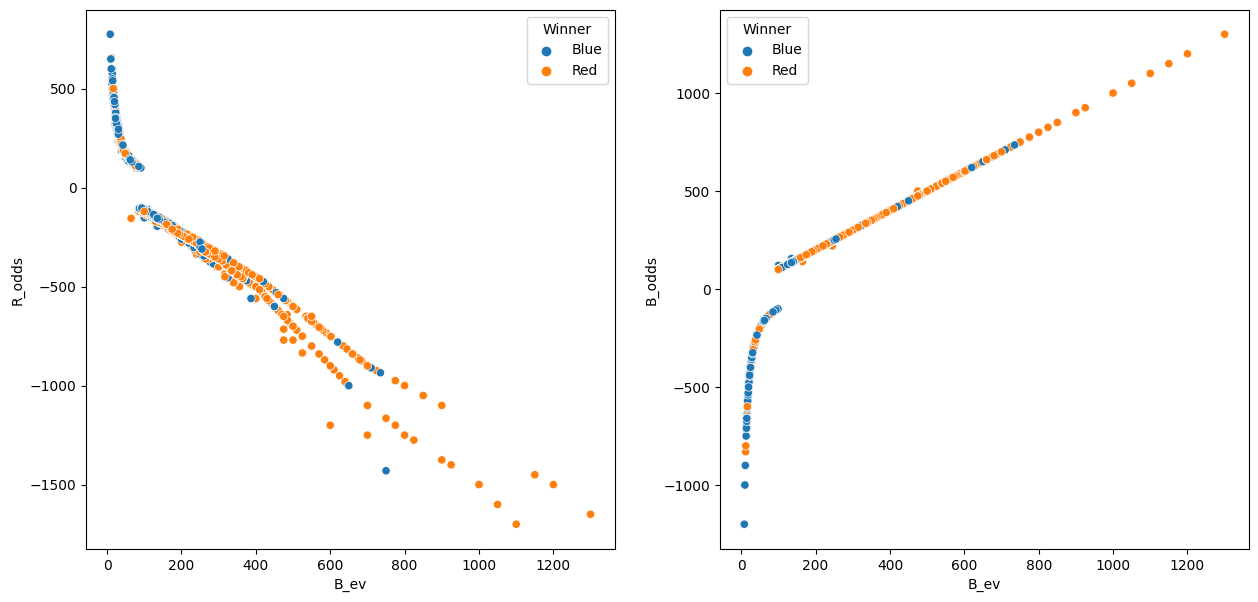

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(x='B_ev', y='R_odds',hue = 'Winner', data=ufc_master_ds, ax=ax[0]);
sns.scatterplot(x='B_ev', y='B_odds',hue = 'Winner', data=ufc_master_ds, ax=ax[1]);
fig.show()
print(ufc_master_ds.shape)

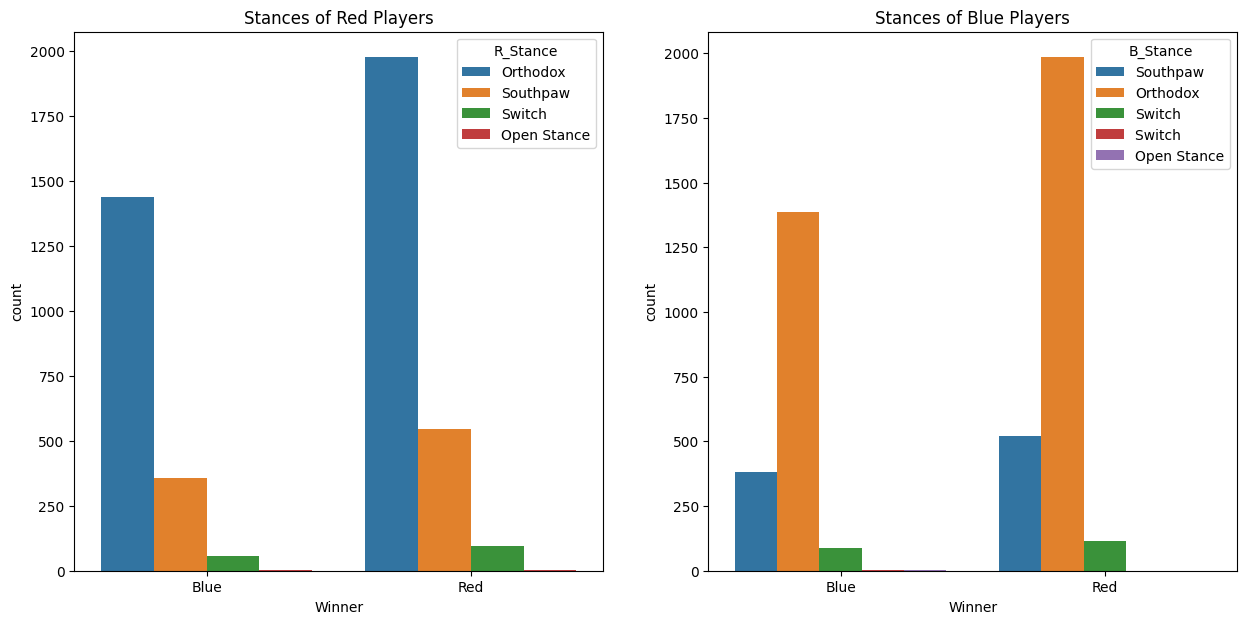

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(x = ufc_master_ds['Winner'], hue = ufc_master_ds['R_Stance'], ax=ax[0])
sns.countplot(x = ufc_master_ds['Winner'], hue = ufc_master_ds['B_Stance'], ax=ax[1])
ax[0].title.set_text('Stances of Red Players')
ax[1].title.set_text('Stances of Blue Players')
fig.show()


## When they say count, is this referring to wins? 
## What is the percentage of fighters that fight out of each stance? 